In [1]:
from src.load_data import load_all_data
from src.sync_data import sync_trade_order_data
from src.feature_engineering import calculate_order_book_depth, calculate_price_acceleration
from src.clustering import perform_clustering, save_regime_transitions
from src.visualization import (
    plot_pca_3d,
    plot_regime_timeline,
    plot_price_with_regimes,
    plot_transition_matrix,
)

In [2]:
def main():
    # Load trade and order book data
    trade_df, book_df = load_all_data('data/aggTrade', 'data/depth20_1000ms')
    print("Data loaded successfully.")
    
    # Sync trade and order book data
    synced_df = sync_trade_order_data(trade_df, book_df)
    print("Data synced successfully.")
    
    # Calculate order book depth for bid and ask
    bid_depth, ask_depth = calculate_order_book_depth(synced_df)
    synced_df['BidDepth'] = bid_depth
    synced_df['AskDepth'] = ask_depth
    print("Order book depth calculated.")
    
    # Calculate price acceleration
    synced_df = calculate_price_acceleration(synced_df)
    print("Price acceleration calculated.")
    
    # Extract features for clustering
    features = synced_df[['Price', 'Quantity', 'BidDepth', 'AskDepth', 'Acceleration']].dropna()
    print("Features extracted for clustering.")
    
    # Perform clustering on the features
    clusters = perform_clustering(features)
    print("Clustering completed.")
    
    # Add cluster information to the dataframe
    synced_df = synced_df.loc[features.index]
    synced_df['Cluster'] = clusters
    print("Cluster labels added to the data.")
    
    # Visualize clusters in 3D using PCA
    plot_pca_3d(features, clusters)
    print("PCA 3D plot generated.")
    
    # Plot regime timeline heatmap
    plot_regime_timeline(synced_df['Time'], clusters)
    print("Regime timeline plot generated.")
    
    # Plot price with regime overlay
    plot_price_with_regimes(synced_df['Time'], synced_df['Price'], clusters)
    print("Price with regimes plot generated.")
    
    # Plot regime transition matrix
    plot_transition_matrix(clusters)
    print("Transition matrix plot generated.")

    # Save regime transitions to CSV
    save_regime_transitions(clusters)

Data loaded successfully.
Data synced successfully.
Order book depth calculated.
Price acceleration calculated.
Features extracted for clustering.
Clustering completed.
Cluster labels added to the data.


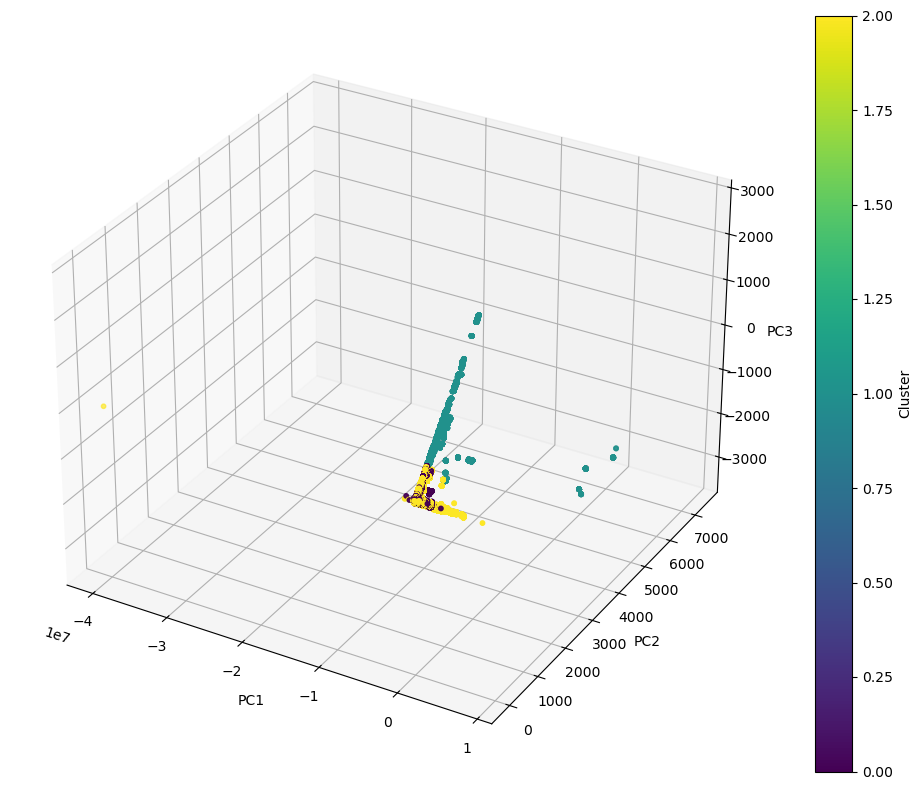

PCA 3D plot generated.


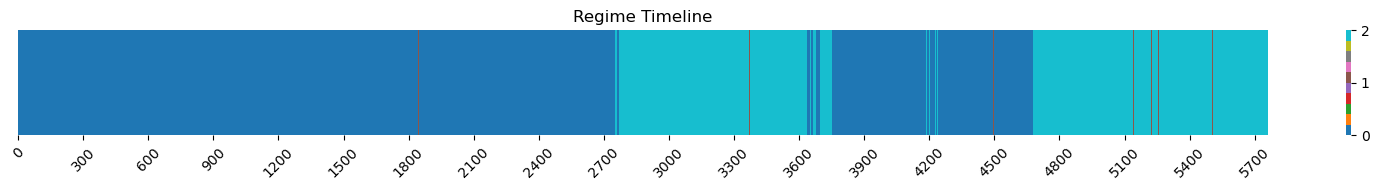

Regime timeline plot generated.


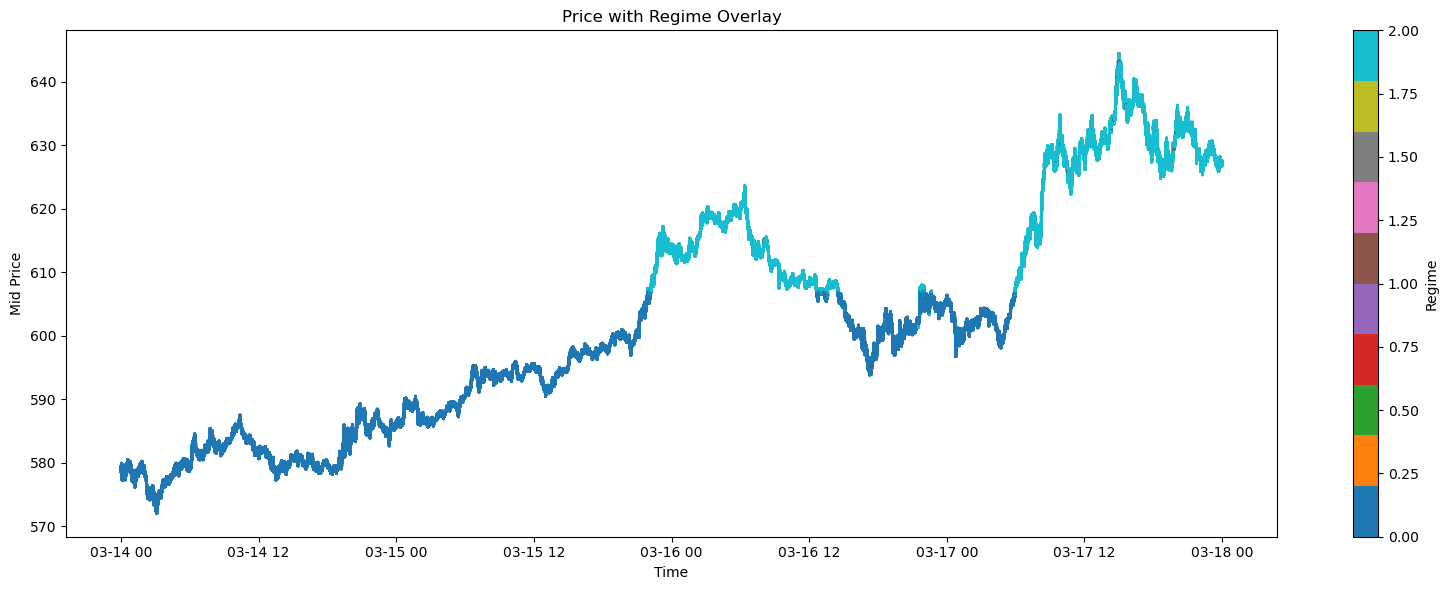

Price with regimes plot generated.


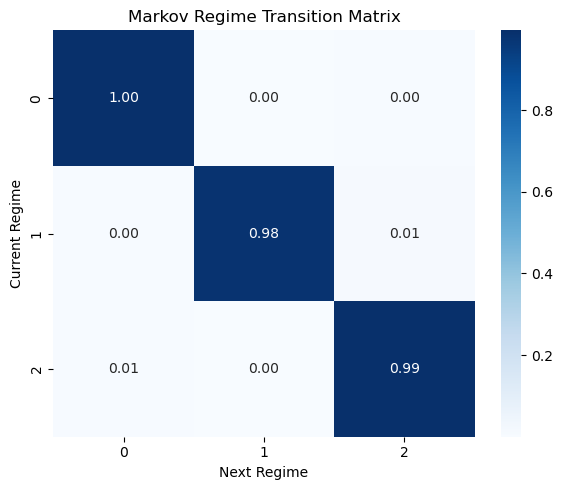

Transition matrix plot generated.
Regime transitions saved to results/regime_transitions.csv


In [3]:
if __name__ == "__main__":
    main()